In [2]:
import numpy as np
from PIL import Image
from numpy.linalg import inv
import matplotlib.pyplot as plt
from numpy import asarray
import cv2
import pathlib

In [4]:
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
# QUESTION 1, Camera Calibration

# Load images to be used from local machine into Colab instance, in this case we have 20 views for our chessboard
from google.colab import files

uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Image1.tif to Image1.tif
Saving Image2.tif to Image2.tif
Saving Image3.tif to Image3.tif
Saving Image4.tif to Image4.tif
Saving Image5.tif to Image5.tif
Saving Image6.tif to Image6.tif
Saving Image7.tif to Image7.tif
Saving Image8.tif to Image8.tif
Saving Image9.tif to Image9.tif
Saving Image10.tif to Image10.tif
Saving Image11.tif to Image11.tif
Saving Image12.tif to Image12.tif
Saving Image13.tif to Image13.tif
Saving Image14.tif to Image14.tif
Saving Image15.tif to Image15.tif
Saving Image16.tif to Image16.tif
Saving Image17.tif to Image17.tif
Saving Image18.tif to Image18.tif
Saving Image19.tif to Image19.tif
Saving Image20.tif to Image20.tif
User uploaded file "Image1.tif" with length 311284 bytes
User uploaded file "Image2.tif" with length 311284 bytes
User uploaded file "Image3.tif" with length 311284 bytes
User uploaded file "Image4.tif" with length 311284 bytes
User uploaded file "Image5.tif" with length 311284 bytes
User uploaded file "Image6.tif" with length 311284 by

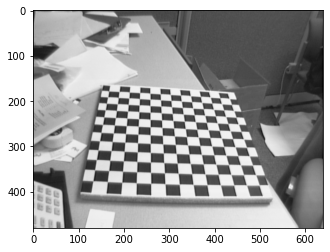

In [6]:
# Check Correct Images was loaded 
img = cv2.imread('Image1.tif')
plt.imshow(img)

In [7]:
# Camera Calibration Function 
def my_calibration(square_size, width, height):
    
    # criteria
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
    
    # object points
    objp = np.zeros((height*width, 3), np.float32)
    objp[:, :2] = np.mgrid[0:width, 0:height].T.reshape(-1, 2)

    objp = objp * square_size

    # Arrays to store object points and image points from all the images.
    objpoints = []  # 3d point in world
    imgpoints = []  # 2d points in plane

    images = ['Image1.tif','Image2.tif', 'Image3.tif','Image4.tif', 'Image5.tif','Image6.tif','Image7.tif','Image8.tif', 'Image9.tif','Image10.tif', 'Image11.tif','Image12.tif','Image13.tif','Image14.tif', 'Image15.tif','Image16.tif','Image17.tif','Image18.tif', 'Image19.tif','Image20.tif']
    
    # Iterate 
    for fname in images:
      img = np.asarray(Image.open(fname))
      corners = cv2.goodFeaturesToTrack(img,144,0.01,10)
      corners = np.int0(corners)
      
      for i in corners:
        x,y = i.ravel()
        cv2.circle(img,(x,y),3,(0,0,255),-1)
        
      objpoints.append(objp)
      corners = np.float32(corners)
      imgpoints.append(corners)

    # Calibrate camera
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img.shape[1::-1], None, None)

    return [ret, mtx, dist, rvecs, tvecs]



In [8]:
#Calling Function, setting width & height to 12 while setting square size to 0.3 cm
[ret,mtx,dist,rvecs,tvecs] = my_calibration(0.3, 12, 12)

print("K: \n",mtx)
print("\n R-matrices: \n", rvecs)
print("\n t-vectors: \n", tvecs)


K: 
 [[  8.30149226   0.         319.49999991]
 [  0.          10.08402064 239.50000001]
 [  0.           0.           1.        ]]

 R-matrices: 
 (array([[ 164.19378584],
       [-224.41073587],
       [  41.0596016 ]]), array([[ 0.80486218],
       [ 1.59175461],
       [-1.73548933]]), array([[-2.41348431],
       [ 0.22704328],
       [ 0.67258963]]), array([[-0.26907368],
       [-0.59415988],
       [ 2.80063956]]), array([[-0.39420522],
       [ 2.82133404],
       [-2.02973257]]), array([[ -6.93801272],
       [-10.02626317],
       [  2.77438756]]), array([[ 0.24722224],
       [ 0.7926606 ],
       [-2.04010327]]), array([[-0.42694595],
       [ 0.64409499],
       [-2.54364776]]), array([[ 1.2535263 ],
       [ 0.42989107],
       [-2.21930387]]), array([[-691.68607195],
       [ 679.66634   ],
       [1156.39366375]]), array([[-1.98069735],
       [-0.4383941 ],
       [ 0.60297602]]), array([[-2.65481352],
       [ 0.87532923],
       [ 1.36065986]]), array([[ 0.27609761]

In [9]:
from scipy.spatial.transform import Rotation as R
#Set Transformation Matrix
transformation = [] 
p = 0

for i in rvecs:
 
  r = R.from_rotvec(rvecs[p].T)
  r= r.as_matrix()
  rr = np.append(r,[])
  rr = np.reshape(rr, (-1, 3))

  t= np.append(tvecs[p],[])
  t = np.reshape(t,(3,1))
  trans = np.hstack((rr,t))
  transformation.append(trans)
  p = p+1
  
tranformation = np.array(transformation)
print(np.array(transformation))


[[[ 2.80012093e-01 -3.64280946e-01  8.88196274e-01 -3.72035050e+02]
  [-6.55172995e-01  6.03727874e-01  4.54159665e-01  4.81202155e+02]
  [-7.01670560e-01 -7.09092411e-01 -6.96159328e-02  1.32416091e+02]]

 [[-6.06627034e-01  7.94823428e-01 -1.61046706e-02  9.86525385e-02]
  [-5.24990932e-02 -6.02656094e-02 -9.96800833e-01  1.77046967e-01]
  [-7.93251213e-01 -6.03840852e-01  7.82862571e-02  2.66279337e+00]]

 [[ 8.55845107e-01 -3.13371635e-01 -4.11494072e-01 -1.16388291e+00]
  [-1.34623344e-04 -7.95704252e-01  6.05685336e-01  1.43423473e+00]
  [-5.17232187e-01 -5.18317434e-01 -6.81041777e-01  1.78984116e+00]]

 [[-9.47625608e-01 -2.18038785e-01 -2.33376938e-01  4.60334768e+00]
  [ 2.94014685e-01 -8.80945214e-01 -3.70797648e-01  1.38457596e+00]
  [-1.24744028e-01 -4.19993593e-01  8.98912849e-01  1.84395786e+00]]

 [[-9.12595317e-01 -3.78489556e-01 -1.54646188e-01  1.93130447e+00]
  [ 2.63033221e-02  3.23102109e-01 -9.45998500e-01 -5.68474014e-01]
  [ 4.08017062e-01 -8.67381510e-01 -2.84

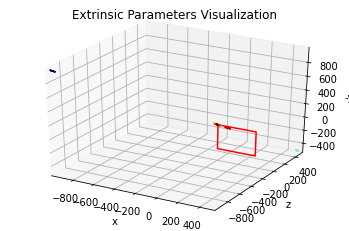

In [10]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from numpy import linspace
import argparse
import cv2 as cv

def inverse_homogeneoux_matrix(M):
    R = M[0:3, 0:3]
    T = M[0:3, 3]
    M_inv = np.identity(4)
    M_inv[0:3, 0:3] = R.T
    M_inv[0:3, 3] = -(R.T).dot(T)

    return M_inv

def transform_to_matplotlib_frame(cMo, X, inverse=False):
    M = np.identity(4)
    M[1,1] = 0
    M[1,2] = 1
    M[2,1] = -1
    M[2,2] = 0

    if inverse:
        return M.dot(inverse_homogeneoux_matrix(cMo).dot(X))
    else:
        return M.dot(cMo.dot(X))

def create_camera_model(camera_matrix, width, height, scale_focal, draw_frame_axis=False):
    fx = camera_matrix[0,0]
    fy = camera_matrix[1,1]
    focal = 2 / (fx + fy)
    f_scale = scale_focal * focal

    # draw image plane
    X_img_plane = np.ones((4,5))
    X_img_plane[0:3,0] = [-width, height, f_scale]
    X_img_plane[0:3,1] = [width, height, f_scale]
    X_img_plane[0:3,2] = [width, -height, f_scale]
    X_img_plane[0:3,3] = [-width, -height, f_scale]
    X_img_plane[0:3,4] = [-width, height, f_scale]

    # draw triangle above the image plane
    X_triangle = np.ones((4,3))
    X_triangle[0:3,0] = [-width, -height, f_scale]
    X_triangle[0:3,1] = [0, -2*height, f_scale]
    X_triangle[0:3,2] = [width, -height, f_scale]

    # draw camera
    X_center1 = np.ones((4,2))
    X_center1[0:3,0] = [0, 0, 0]
    X_center1[0:3,1] = [-width, height, f_scale]

    X_center2 = np.ones((4,2))
    X_center2[0:3,0] = [0, 0, 0]
    X_center2[0:3,1] = [width, height, f_scale]

    X_center3 = np.ones((4,2))
    X_center3[0:3,0] = [0, 0, 0]
    X_center3[0:3,1] = [width, -height, f_scale]

    X_center4 = np.ones((4,2))
    X_center4[0:3,0] = [0, 0, 0]
    X_center4[0:3,1] = [-width, -height, f_scale]

    # draw camera frame axis
    X_frame1 = np.ones((4,2))
    X_frame1[0:3,0] = [0, 0, 0]
    X_frame1[0:3,1] = [f_scale/2, 0, 0]

    X_frame2 = np.ones((4,2))
    X_frame2[0:3,0] = [0, 0, 0]
    X_frame2[0:3,1] = [0, f_scale/2, 0]

    X_frame3 = np.ones((4,2))
    X_frame3[0:3,0] = [0, 0, 0]
    X_frame3[0:3,1] = [0, 0, f_scale/2]

    if draw_frame_axis:
        return [X_img_plane, X_triangle, X_center1, X_center2, X_center3, X_center4, X_frame1, X_frame2, X_frame3]
    else:
        return [X_img_plane, X_triangle, X_center1, X_center2, X_center3, X_center4]

def create_board_model(extrinsics, board_width, board_height, square_size, draw_frame_axis=False):
    width = board_width*square_size
    height = board_height*square_size

    # draw calibration board
    X_board = np.ones((4,5))
    #X_board_cam = np.ones((extrinsics.shape[0],4,5))
    X_board[0:3,0] = [0,0,0]
    X_board[0:3,1] = [width,0,0]
    X_board[0:3,2] = [width,height,0]
    X_board[0:3,3] = [0,height,0]
    X_board[0:3,4] = [0,0,0]

    # draw board frame axis
    X_frame1 = np.ones((4,2))
    X_frame1[0:3,0] = [0, 0, 0]
    X_frame1[0:3,1] = [height/2, 0, 0]

    X_frame2 = np.ones((4,2))
    X_frame2[0:3,0] = [0, 0, 0]
    X_frame2[0:3,1] = [0, height/2, 0]

    X_frame3 = np.ones((4,2))
    X_frame3[0:3,0] = [0, 0, 0]
    X_frame3[0:3,1] = [0, 0, height/2]

    if draw_frame_axis:
        return [X_board, X_frame1, X_frame2, X_frame3]
    else:
        return [X_board]

def draw_camera_boards(ax, camera_matrix, cam_width, cam_height, scale_focal,
                       extrinsics, board_width, board_height, square_size,
                       patternCentric):
    min_values = np.zeros((3,1))
    min_values = np.inf
    max_values = np.zeros((3,1))
    max_values = -np.inf

    if patternCentric:
        X_moving = create_camera_model(camera_matrix, cam_width, cam_height, scale_focal)
        X_static = create_board_model(extrinsics, board_width, board_height, square_size)
    else:
        X_static = create_camera_model(camera_matrix, cam_width, cam_height, scale_focal, True)
        X_moving = create_board_model(extrinsics, board_width, board_height, square_size)

    cm_subsection = linspace(0.0, 1.0, extrinsics.shape[0])
    colors = [ cm.jet(x) for x in cm_subsection ]

    for i in range(len(X_static)):
        X = np.zeros(X_static[i].shape)
        for j in range(X_static[i].shape[1]):
            X[:,j] = transform_to_matplotlib_frame(np.eye(4), X_static[i][:,j])
        ax.plot3D(X[0,:], X[1,:], X[2,:], color='r')
        min_values = np.minimum(min_values, X[0:3,:].min(1))
        max_values = np.maximum(max_values, X[0:3,:].max(1))

    for idx in range(extrinsics.shape[0]):
        R, _ = cv.Rodrigues(extrinsics[idx,0:3,0:3])
        cMo = np.eye(4,4)
        cMo[0:3,0:3] = R
        cMo[0:3,3] = extrinsics[idx,:,3]
        for i in range(len(X_moving)):
            X = np.zeros(X_moving[i].shape)
            for j in range(X_moving[i].shape[1]):
                X[0:4,j] = transform_to_matplotlib_frame(cMo, X_moving[i][0:4,j], patternCentric)
            ax.plot3D(X[0,:], X[1,:], X[2,:], color=colors[idx])
            min_values = np.minimum(min_values, X[0:3,:].min(1))
            max_values = np.maximum(max_values, X[0:3,:].max(1))

    return min_values, max_values

def main():
    board_width = 12
    board_height = 12
    square_size = 30
    camera_matrix = mtx
    extrinsics = np.array(transformation)

    fig = plt.figure()
    ax = fig.gca(projection='3d')
    #ax.set_aspect("equal")

    cam_width = 5
    cam_height = 5
    scale_focal =  8.30149226
    min_values, max_values = draw_camera_boards(ax, camera_matrix, cam_width, cam_height,
                                                scale_focal, extrinsics, board_width,
                                                board_height, square_size, 'patternCentric')

    X_min = min_values[0]
    X_max = max_values[0]
    Y_min = min_values[1]
    Y_max = max_values[1]
    Z_min = min_values[2]
    Z_max = max_values[2]
    max_range = np.array([X_max-X_min, Y_max-Y_min, Z_max-Z_min]).max() / 2.0

    mid_x = (X_max+X_min) * 0.5
    mid_y = (Y_max+Y_min) * 0.5
    mid_z = (Z_max+Z_min) * 0.5
    ax.set_xlim(mid_x - max_range, mid_x + max_range)
    ax.set_ylim(mid_y - max_range, mid_y + max_range)
    ax.set_zlim(mid_z - max_range, mid_z + max_range)

    ax.set_xlabel('x')
    ax.set_ylabel('z')
    ax.set_zlabel('-y')
    ax.set_title('Extrinsic Parameters Visualization')

    plt.show()

if __name__ == "__main__":
    main()

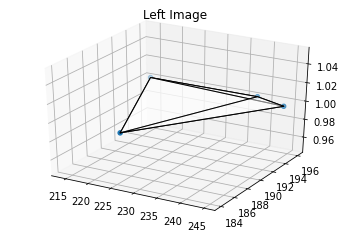

In [185]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection
#Question 2, Simple Reconstruction

vertices = [[0, 1, 2], [0, 1, 3], [0, 2, 3], [1, 2, 3]]
#Intrinsic Parameters
K = np.array([
    [-100, 0, 200],
    [0,-100, 200],
    [0, 0, 1]
    ])

Mextleft = np.array([
      [0.707, 0.707, 0, -3],
      [-0.707, 0.707, 0, -0.5],
      [0, 0, 1, 3]
      ])
Mextright = np.array([
      [0.866, -0.5, 0, -3],
      [0.5, 0.866, 0, -0.5],
      [0, 0, 1, 3]
      ])

NN =4
pix = np.zeros((NN,3))
leftpix = []
rightpix = []
for i in range (NN):
  x = np.array([vertices[i][0], vertices[i][1], vertices[i][2], 1])
  x = np.reshape(x,(4,1))
  pixels = np.matmul(K, Mextleft)
  pixels = np.matmul(pixels, x)
  lp = pixels / int(pixels[2])
  leftpix.append(lp)
  pixels = np.matmul(K, Mextright)
  pixels = np.matmul(pixels, x)
  rp = pixels / int(pixels[2])
  rightpix.append(rp)
  
#Plot left image
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x=[]
for i in range(NN):
  x.append(int(leftpix[i][0]))

y=[]
for i in range(NN):
  y.append(int(leftpix[i][1]))

z=[]
for i in range(NN):
  z.append(int(leftpix[i][2]))

tupleList = list(zip(x, y, z))
poly3d = [[tupleList[vertices[ix][iy]] for iy in range(len(vertices[0]))] for ix in range(len(vertices))]
ax.scatter(x,y,z)
ax.add_collection3d(Poly3DCollection(poly3d, edgecolors='k', facecolors='w', linewidths=1, alpha=0.5))
ax.set_title('Left Image')
plt.show()

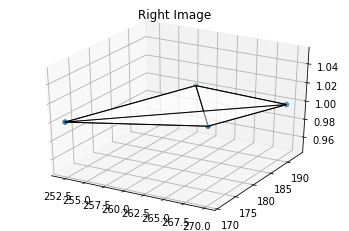

In [186]:
#Plot Right Image
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x=[]
for i in range(NN):
  x.append(int(rightpix[i][0]))

y=[]
for i in range(NN):
  y.append(int(rightpix[i][1]))

z=[]
for i in range(NN):
  z.append(int(rightpix[i][2]))

tupleList = list(zip(x, y, z))
poly3d = [[tupleList[vertices[ix][iy]] for iy in range(len(vertices[0]))] for ix in range(len(vertices))]
ax.scatter(x,y,z)
ax.add_collection3d(Poly3DCollection(poly3d, edgecolors='k', facecolors='w', linewidths=1, alpha=0.5))
ax.set_title('Right Image')
plt.show()

In [187]:
#From pixels to rays
#right
rightray = np.linalg.inv(K) * [rightpix[:][1], rightpix[:][2], rightpix[:][3]]
print('Right Ray: \n', rightray)

#left
leftray = np.linalg.inv(K) * [leftpix[:][1], leftpix[:][2], leftpix[:][3]]
print('\nLeft Ray: \n', leftray)

Right Ray: 
 [[[ -2.58333333  -0.         516.66666667]
  [ -0.          -1.939      387.8       ]
  [  0.           0.           1.        ]]

 [[ -2.66666667  -0.         533.33333333]
  [ -0.          -1.79466667 358.93333333]
  [  0.           0.           1.        ]]

 [[ -2.52233333  -0.         504.46666667]
  [ -0.          -1.71133333 342.26666667]
  [  0.           0.           1.        ]]]

Left Ray: 
 [[[ -2.38216667  -0.         476.43333333]
  [ -0.          -1.9655     393.1       ]
  [  0.           0.           1.        ]]

 [[ -2.26433333  -0.         452.86666667]
  [ -0.          -1.84766667 369.53333333]
  [  0.           0.           1.        ]]

 [[ -2.1465      -0.         429.3       ]
  [ -0.          -1.9655     393.1       ]
  [  0.           0.           1.        ]]]


In [204]:
from sklearn import preprocessing
#Define Functions
def triangulate_midpoint(pl,pr,Rlr,tlr):
  plt = pl
  prt = pr
  q = np.cross(plt,Rlr*prt)
  q = np.divide(q,(preprocessing.normalize(q)))
  q = np.nan_to_num(q)
  q = q+0.00001*np.random.rand(3, 3) #adding noise to account for zeros (nan)
  A = np.array([plt])
  A = np.concatenate((A, [(-Rlr*prt)]))
  A = np.concatenate((A,[q]))
  a = (np.linalg.inv(A[0]))*tlr
  b = (np.linalg.inv(A[1]))*tlr
  c = (np.linalg.inv(A[2]))*tlr
  outpoint = a*plt + c*0.5*q
  return outpoint

def reconstruct3d(leftray,rightray,Rlr,tlr,Twl):
  NN = 3
  reconpts = []
  for i in range (NN):
    wrt_left = triangulate_midpoint(leftray[:][i],rightray[:][i],Rlr,tlr)
    s = np.concatenate((wrt_left,[[1,1,1]]))
    three_d_point = np.matmul(Twl, s)
    print('three d point \n' ,three_d_point)
    if i==0:
      reconpts = three_d_point
    else:
      reconpts = np.concatenate((reconpts,three_d_point))
  
  print('reconpts \n', reconpts)
  
  return reconpts
   

In [205]:
#Reconstruction each vertex
Trw = np.append(Mextright, (0, 0, 0, 1))
Trw = np.reshape(Trw,(4,4))
Tlw = np.append(Mextleft, (0, 0, 0, 1))
Tlw = np.reshape(Tlw,(4,4))
Twr = np.linalg.inv(Trw)
Twl = np.linalg.inv(Tlw)

Tlr = Tlw*Twr
#Rotation from right to left
Rlr = Tlr[0:3,0:3]
#translation
tlr = Tlr[0:3,3]

reconpts = reconstruct3d(leftray,rightray,Rlr,tlr,Twl)


three d point 
 [[-2.40355520e+00  1.69535115e+00 -1.06080269e+05]
 [-5.43856071e+00  3.15719482e+00 -1.10689993e+06]
 [-2.99999998e+00 -3.00000000e+00 -1.65000002e+01]
 [ 1.00000000e+00  1.00000000e+00  1.00000000e+00]]
three d point 
 [[-2.61546267e+00  1.73425770e+00 -1.06080269e+05]
 [-5.22665324e+00  3.19610137e+00 -1.04689993e+06]
 [-2.99999995e+00 -3.00000001e+00 -1.65000000e+01]
 [ 1.00000000e+00  1.00000000e+00  1.00000000e+00]]
three d point 
 [[-2.39761724e+00  1.69438749e+00 -4.60802687e+04]
 [-5.44449868e+00  3.15623116e+00 -1.04689993e+06]
 [-2.99999978e+00 -3.00000002e+00 -1.65000007e+01]
 [ 1.00000000e+00  1.00000000e+00  1.00000000e+00]]
reconpts 
 [[-2.40355520e+00  1.69535115e+00 -1.06080269e+05]
 [-5.43856071e+00  3.15719482e+00 -1.10689993e+06]
 [-2.99999998e+00 -3.00000000e+00 -1.65000002e+01]
 [ 1.00000000e+00  1.00000000e+00  1.00000000e+00]
 [-2.61546267e+00  1.73425770e+00 -1.06080269e+05]
 [-5.22665324e+00  3.19610137e+00 -1.04689993e+06]
 [-2.99999995e+00 -3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


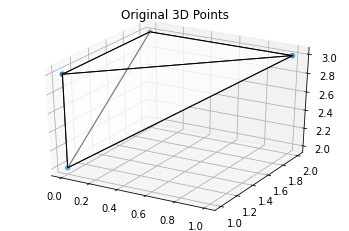

In [206]:
#Original Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x=[]
for i in range(NN):
  x.append(int(vertices[i][0]))

y=[]
for i in range(NN):
  y.append(int(vertices[i][1]))

z=[]
for i in range(NN):
  z.append(int(vertices[i][2]))

tupleList = list(zip(x, y, z))
poly3d1 = [[tupleList[vertices[ix][iy]] for iy in range(len(vertices[0]))] for ix in range(len(vertices))]
ax.scatter(x,y,z)
ax.add_collection3d(Poly3DCollection(poly3d1, edgecolors='k', facecolors='w', linewidths=1, alpha=0.5))
ax.set_title('Original 3D Points')
plt.show()

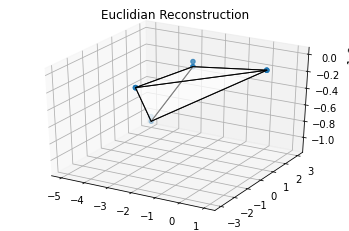

In [207]:
#Reconstruction Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

N = len(reconpts)

x=[]
for i in range(N):
  x.append(int(reconpts[i][0]))

y=[]
for i in range(N):
  y.append(int(reconpts[i][1]))

z=[]
for i in range(N):
  z.append(int(reconpts[i][2]))

tupleList = list(zip(x, y, z))
poly3d2 = [[tupleList[vertices[ix][iy]] for iy in range(len(vertices[0]))] for ix in range(len(vertices))]
ax.scatter(x,y,z)
ax.add_collection3d(Poly3DCollection(poly3d2, edgecolors='k', facecolors='w', linewidths=1, alpha=0.5))
ax.set_title('Euclidian Reconstruction')
plt.show()

In [210]:
#Table Comparison

#Original Vertex
print('Original Vertics: \n', vertices)

#Recnstructed Vertices
Reconstructed_vertices = [ poly3d2[0][0], poly3d2[0][1], poly3d2[0][2], poly3d2[1][2]]
print('\nReconstructed Vertics: \n',Reconstructed_vertices)

Original Vertics: 
 [[0, 1, 2], [0, 1, 3], [0, 2, 3], [1, 2, 3]]

Reconstructed Vertics: 
 [(-2, 1, -106080), (-5, 3, -1106899), (-2, -3, -16), (1, 1, 1)]
